In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
#import data
df = pd.read_csv('production_yield_2020.csv') 
df.head()

,Longitude,Latitude,Field,Dataset,Product,Obj. Id,Swth Wdth(ft),Distance(ft),Duration(s),Track(deg),...,Moisture(%),Crop Flw(M)(lb/s),Speed(mph),Crop Flw(V)(bu/h),Yld Mass(Wet)(lb/ac),Yld Mass(Dry)(lb/ac),Yld Vol(Wet)(bu/ac),Yld Vol(Dry)(bu/ac),Prod(ac/h),Date
0,-93.537012,44.065673,AERF East 80,harvest_1_Corn_2020_10_31_000,CORN,1,14.99,2.461,1.0,230.0,...,13.47,0.549,3.516,35.28,648.01,648.01,11.57,11.57,3.049,10/31/2020
1,-93.537020,44.065670,AERF East 80,harvest_1_Corn_2020_10_31_000,CORN,2,14.99,2.526,1.0,232.0,...,13.47,0.921,3.656,59.18,1058.70,1058.70,18.91,18.91,3.130,10/31/2020
2,-93.537028,44.065668,AERF East 80,harvest_1_Corn_2020_10_31_000,CORN,3,14.99,2.329,1.0,239.0,...,13.47,1.124,3.638,72.27,1402.10,1402.10,25.04,25.04,2.886,10/31/2020
3,-93.537035,44.065666,AERF East 80,harvest_1_Corn_2020_10_31_000,CORN,4,14.99,1.345,1.0,243.0,...,13.47,1.151,3.602,73.98,2485.50,2485.50,44.38,44.38,1.667,10/31/2020
4,-93.537034,44.065666,AERF East 80,harvest_1_Corn_2020_10_31_000,CORN,5,14.99,1.181,1.0,242.0,...,13.47,1.124,3.650,72.27,2765.30,2765.30,49.38,49.38,1.464,10/31/2020


In [13]:
#create lists of data values from data frame
d_yld_mass = df['Yld Mass(Dry)(lb/ac)']
elev = df['Elevation(ft)']
mo = df['Moisture(%)']

d_mass_elev_cols = df[['Yld Mass(Dry)(lb/ac)', 'Elevation(ft)']]
d_mass_mo_cols = df[['Yld Mass(Dry)(lb/ac)', 'Moisture(%)']]
d_mass_elev_cols

,Yld Mass(Dry)(lb/ac),Elevation(ft)
0,648.01,1157.3
1,1058.70,1157.3
2,1402.10,1157.5
3,2485.50,1157.5
4,2765.30,1157.5
...,...,...
31775,9778.00,1145.0
31776,8650.90,1144.9
31777,7044.70,1144.7
31778,7710.90,1144.7


In [14]:
X_elev = d_mass_elev_cols['Elevation(ft)'].values.reshape(-1, 1)
y_yld_mass = d_mass_elev_cols['Yld Mass(Dry)(lb/ac)']

reg_elev = LinearRegression()
reg_elev.fit(X_elev, y_yld_mass)

LinearRegression()

In [15]:
r2_elev = reg_elev.score(X_elev, y_yld_mass)
r2_elev

0.050050324517916134

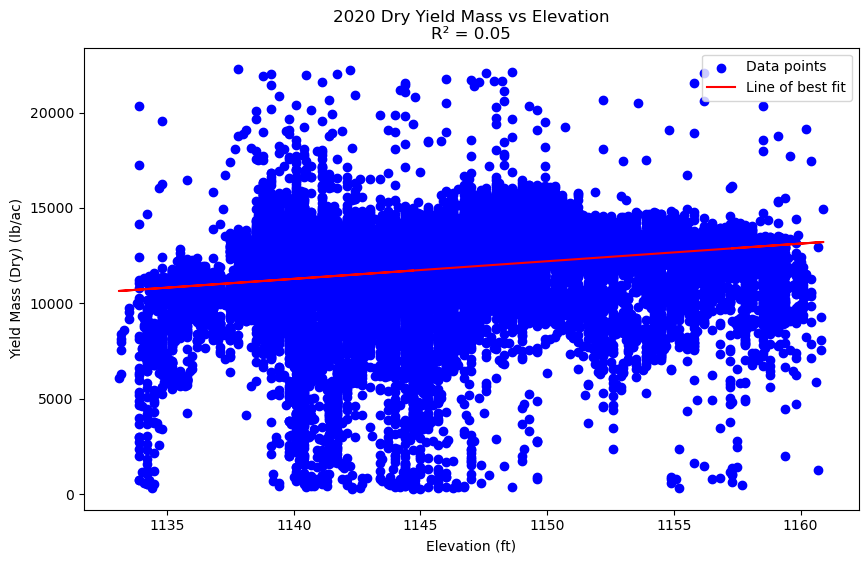

In [16]:
#elevation vs mass line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X_elev, y_yld_mass, color='blue', label='Data points')
plt.plot(X_elev, reg_elev.predict(X_elev), color='red', label='Line of best fit')
plt.xlabel('Elevation (ft)')
plt.ylabel('Yield Mass (Dry) (lb/ac)')
plt.title(f'2020 Dry Yield Mass vs Elevation\nR² = {r2_elev:.2f}')
plt.legend()
plt.savefig('elev_vs_d_yld_mass_2020.pdf')
plt.show()

In [17]:
X_mo = d_mass_mo_cols['Moisture(%)'].values.reshape(-1, 1)
y_yld_mass = d_mass_mo_cols['Yld Mass(Dry)(lb/ac)']

reg_mo = LinearRegression()
reg_mo.fit(X_mo, y_yld_mass)

LinearRegression()

In [18]:
r2_mo = reg_mo.score(X_mo, y_yld_mass)
r2_mo

0.008059858427235222

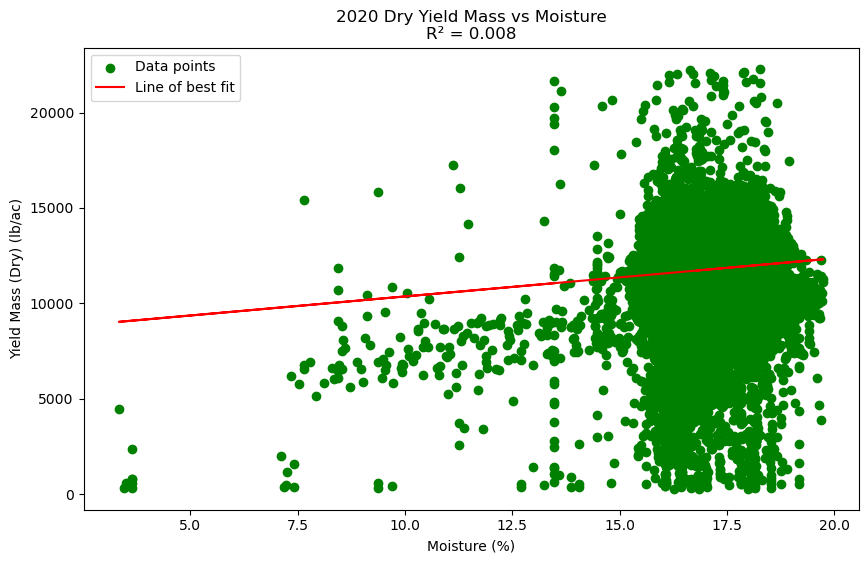

In [19]:
#moisture vs mass line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(X_mo, y_yld_mass, color='green', label='Data points')
plt.plot(X_mo, reg_mo.predict(X_mo), color='red', label='Line of best fit')
plt.xlabel('Moisture (%)')
plt.ylabel('Yield Mass (Dry) (lb/ac)')
plt.title(f'2020 Dry Yield Mass vs Moisture\nR² = {r2_mo:.3f}')
plt.legend()
plt.savefig('elev_vs_d_yld_mass_mo.pdf')
plt.show()